## RNN → LSTM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df_data = pd.read_csv("/content/drive/MyDrive/CDS2(2022-2)/SigDataset/Train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/CDS2(2022-2)/SigDataset/Test.csv")

##### 1) 데이터 확인 및 데이터 전처리

* 시계열 데이터와 해당하는 Label(grade) ↔ sin 함수와 비교

In [4]:
df_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [5]:
df_data.shape

(620, 29)

→ 0번부터 27번까지 28개의 feature와 grade 존재

In [6]:
df_data['grade'].unique()

array([2, 4, 3, 1, 0])

→ Label

In [7]:
df_new = df_data.copy()
# data 복사
df_new_1 = df_test.copy()
# test 복사

* 데이터 전처리

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
label = list(df_new.columns)
# 컬럼 이름을 저장해둔다.
# -> 전처리를 위해 list로 변환했다가 나중에 다시 dataframe으로 변환할때 사용

In [10]:
label_2 = label[-1]
# 라벨 컬럼은 따로 저장
del label[-1]
# 다른 컬럼에서도 삭제

In [11]:
label_2 

'grade'

→ Label만 존재

In [12]:
label

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27']

→ Label 제거

* numpy로 변환

In [13]:
X = df_new.loc[:, label].to_numpy()
# 컬럼값에 해당하는 값 numpy로 변환
y = df_new.loc[:, label_2].to_numpy()
# 라벨에 해당하는 값 numpy로 변환

In [14]:
test_feature = df_new_1.loc[:, label].to_numpy()
# test 복사한 값에서 label 제외한 값 numpy형태 변환

In [15]:
X

array([[ 1.84856378, -0.26425011, -0.46142282, ...,  0.27188562,
         3.72721812,  0.10212858],
       [-0.82509768, -0.26425011,  3.03239652, ...,  0.27188562,
        -0.23247214,  0.10212858],
       [ 1.84856378, -0.26425011, -0.46142282, ...,  0.27188562,
        -0.23247214,  0.10212858],
       ...,
       [-0.82509768, -0.26425011, -0.46142282, ...,  0.27188562,
        -0.23247214,  0.10212858],
       [-0.82509768, -0.26425011,  2.00480259, ...,  0.27188562,
        -0.23247214,  0.10212858],
       [-0.37948743,  3.06874175, -0.46142282, ...,  0.27188562,
        -0.23247214,  0.10212858]])

In [16]:
y

array([2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 0, 2, 1, 1,
       2, 2, 1, 4, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 3, 1, 2, 4, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 1, 2, 3, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 4, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,

* train, valid : 시계열이기에 섞지 않는다.

In [17]:
train_feature, val_feature, train_label, val_label = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=2022)

In [18]:
print(train_feature.shape, train_label.shape, val_feature.shape, train_label.shape)

(496, 28) (496,) (124, 28) (496,)


In [19]:
train_feature.shape

(496, 28)

* 0~1 사이로 정규화 

In [20]:
Scaler = StandardScaler().fit(train_feature)

In [21]:
train_feature = Scaler.transform(train_feature)
val_feature = Scaler.transform(val_feature)
test_feature = Scaler.transform(test_feature)
# test data도 train으로 학습하여 scaling : data leakage 방지
# 각각의 feature(label 제외) scaling 진행

* 다시 Dataframe 형태로 변환

In [22]:
train_feature = pd.DataFrame(train_feature, columns= label)
val_feature = pd.DataFrame(val_feature, columns= label)
test_feature = pd.DataFrame(test_feature, columns= label)
# 위에서 따로 저장해둔 columns

In [23]:
train_label = pd.Series(train_label, name= label_2)
val_label = pd.Series(val_label, name= label_2)
# 위에서 따로 저장해둔 label column

In [24]:
train_feature.iloc[0:20]

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,1.845703,-0.264585,-0.444235,0.395193,1.349582,2.321111,0.370965,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,-1.093019,0.438956,-0.423359,-0.673681,0.2631,3.484080,0.114332
1,-0.849494,-0.264585,3.147128,-2.530412,1.349582,-0.274293,0.370965,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,-1.093019,-0.237456,-0.423605,-0.673681,0.2631,-0.248325,0.114332
2,1.845703,-0.264585,-0.444235,0.395193,1.349582,2.321111,0.370965,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,0.914897,1.456398,1.216257,1.948416,0.2631,-0.248325,0.114332
3,0.498104,-0.264585,-0.444235,0.395193,-0.504691,-0.274293,0.370965,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,0.914897,-0.012738,-0.423605,1.566922,0.2631,-0.248325,0.114332
4,-0.849494,-0.264585,-0.444235,0.395193,-0.504691,-0.274293,0.370965,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,0.914897,-0.578485,-1.187444,1.948416,0.2631,-0.248325,0.114332
5,-0.849494,-0.264585,-0.444235,0.395193,1.349582,-0.274293,-2.695676,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,-1.093019,0.438956,1.080650,-0.673681,0.2631,-0.248325,0.114332
6,-0.849494,-0.264585,-0.444235,0.395193,-0.504691,-0.274293,-2.695676,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,0.914897,-0.238585,1.327208,1.948416,0.2631,-0.248325,0.114332
7,0.498104,-0.264585,-0.444235,0.395193,-0.504691,-0.274293,0.370965,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,0.914897,-0.916127,-0.423359,-0.593084,0.2631,-0.248325,0.114332
8,-0.400295,4.498249,-0.444235,0.395193,1.349582,-0.274293,0.370965,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,-1.093019,1.229422,-0.349391,-0.673681,0.2631,3.484080,0.114332
9,0.048905,-0.264585,-0.444235,0.395193,1.349582,2.656002,0.370965,0.090167,0.10535,0.0,...,0.150600,0.07681,0.239936,-1.093019,0.438956,-0.423359,-0.673681,0.2631,-0.248325,0.114332


In [25]:
train_label

0      2
1      4
2      2
3      2
4      2
      ..
491    2
492    2
493    2
494    2
495    2
Name: grade, Length: 496, dtype: int64

* window_size 만큼 input을 만들어서 다음 시점의 output을 구하는 함수
    - 20개씩 끊어서 sequence로 입력하여 마지막 sequence의 label을 예측
    <br>→ 원래는 feature마다 1개 값을 독립변수로 하여 y를 예측하는 방식으로 model을 만들었다면, 이번에는 각 feature의 추세를 반영할 수 있는 model로 변경(20 step) 

In [26]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        # window_size를 만들었을때 전체 데이터의 수 만큼 반복
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        # 시작점부터 데이터 윈도우 사이즈 지점까지
        label_list.append(np.array(label.iloc[i+window_size-1]))
        # label은 window_size까지의 step 바로 다음시점으로 지정
    return np.array(feature_list), np.array(label_list)
    # feature와 label을 return

In [27]:
# test data에 사용할 동일한 함수
def make_test_dataset(data, window_size=20):
    feature_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
    return np.array(feature_list)

In [28]:
train_feature, train_label = make_dataset(train_feature, train_label, 20)
# 위에서 만든 함수 적용

In [29]:
len(train_feature)

476

In [30]:
train_feature.shape

(476, 20, 28)

In [31]:
train_label.shape

(476,)

In [32]:
val_feature, val_label = make_dataset(val_feature, val_label, 20)
# 검증용 데이터 셋에 적용

In [33]:
val_feature.shape

(104, 20, 28)

In [34]:
val_label.shape

(104,)

In [35]:
test_feature = make_test_dataset(test_feature, 20)

In [36]:
test_feature.shape

(246, 20, 28)

##### 2) Model 구축

* RNN

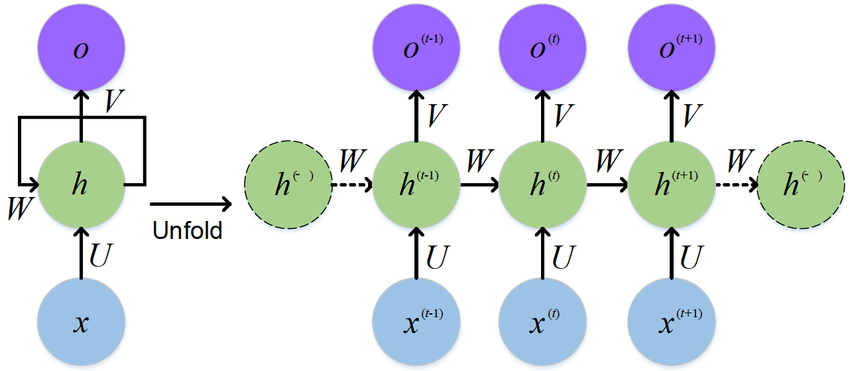

In [37]:
from IPython.display import Image
Image('/content/drive/MyDrive/CDS2(2022-2)/img/05/rnn.png')

In [38]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
import tensorflow as tf


model = Sequential()
model.add(SimpleRNN(20, input_shape=(train_feature.shape[1], train_feature.shape[2]), # input_length : 20 , input_dim : 28
                   return_sequences=True)) # input_dim 만큼의 hidden state 출력 : 그 다음층의 RNN에 전달
model.add(SimpleRNN(20, return_sequences = False))
model.add(Dense(5, activation='softmax')) # class갯수 맞춰줘야한다.

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20, 20)            980       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 5)                 105       
                                                                 
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


In [40]:
28 * 20 + 20 * 20 +  20

980

In [41]:
20 * 20 + 20 * 20 + 20

820

In [42]:
20 * 5 + 5

105

In [43]:
history = model.fit(train_feature, train_label, 
                    epochs=30, 
                    batch_size=8,
                    validation_data = (val_feature, val_label),
                   shuffle = False)

Epoch 1/30
60/60 [==============================] - 8s 81ms/step - loss: 1.4842 - accuracy: 0.4328 - val_loss: 1.1920 - val_accuracy: 0.6346
Epoch 2/30
60/60 [==============================] - 2s 32ms/step - loss: 0.8455 - accuracy: 0.7521 - val_loss: 0.8576 - val_accuracy: 0.7019
Epoch 3/30
60/60 [==============================] - 2s 30ms/step - loss: 0.6811 - accuracy: 0.7836 - val_loss: 0.8167 - val_accuracy: 0.7115
Epoch 4/30
60/60 [==============================] - 2s 30ms/step - loss: 0.5954 - accuracy: 0.7899 - val_loss: 0.7853 - val_accuracy: 0.7308
Epoch 5/30
60/60 [==============================] - 2s 31ms/step - loss: 0.5347 - accuracy: 0.8046 - val_loss: 0.7535 - val_accuracy: 0.7308
Epoch 6/30
60/60 [==============================] - 2s 30ms/step - loss: 0.4826 - accuracy: 0.8298 - val_loss: 0.7238 - val_accuracy: 0.7692
Epoch 7/30
60/60 [==============================] - 2s 30ms/step - loss: 0.4373 - accuracy: 0.8487 - val_loss: 0.6985 - val_accuracy: 0.7788
Epoch 8/30
60

* 성능 시각화

In [44]:
xhat = val_label
yhat = model.predict(val_feature)
# 검증 데이터로 예측

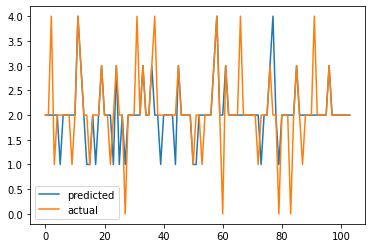

In [45]:
yhat = np.array([np.argmax(i) for i in yhat])
# 가장 높은 확률 값에 해당하는 index 위치의 값

plt.figure()
plt.plot(yhat, label = "predicted")
# 예측 label
plt.plot(val_label,label = "actual")
# 실제 label

plt.legend(prop={'size': 10})
plt.show()

* confusion matrix

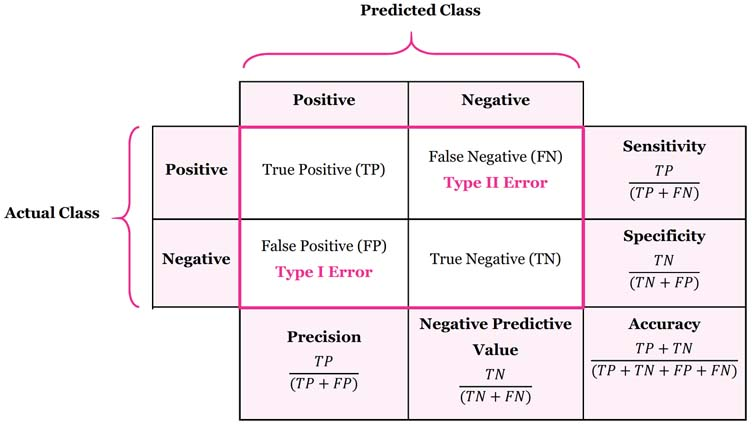

In [46]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/05/cfm.jpg')

In [47]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [48]:
def print_stats(preds, labels):
    print("Accuracy = {}".format(accuracy_score(labels, preds)))
    print("Precision = {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall = {}".format(recall_score(labels, preds, average='weighted')))
    print("f1_score = {}".format(f1_score(labels, preds, average='weighted')))

In [49]:
val_label

array([2, 2, 4, 1, 2, 2, 2, 2, 2, 1, 2, 4, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2,
       1, 2, 3, 2, 2, 0, 2, 2, 2, 4, 2, 3, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 4, 2, 0, 3, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 1,
       2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2])

In [50]:
yhat

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 3, 2, 1, 1, 2, 1, 2, 3, 2, 2,
       2, 1, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2,
       1, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 4, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2])

In [51]:
print_stats(val_label, yhat)

Accuracy = 0.7596153846153846
Precision = 0.7855936293436294
Recall = 0.7596153846153846
f1_score = 0.7687280159134465


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* test

In [52]:
test_predict = model.predict(test_feature)
test_predict = [np.argmax(i) for i in test_predict]

In [53]:
test_predict

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 4,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 4,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 4,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2]

* LSTM

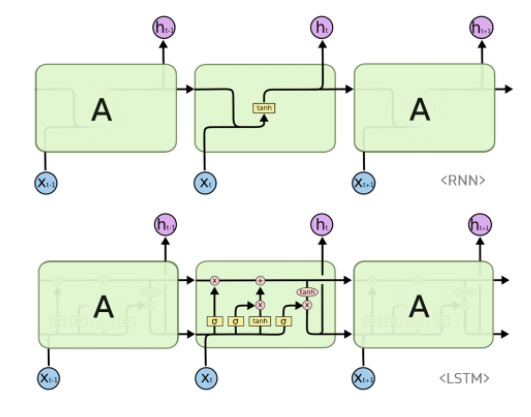

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/05/lstm.png')

* 1) 이전에 누적되어있던 새로들어오는 정보를 버릴지 말지(sigmoid:0에서1) 얼마나 반영할지 결정하는 단계
* 2) 현재 정보(+이전 정보)를 얼마나 업데이트 할 것(sigmoid:0에서1,tanh:-1에서+1 → 학습의 방향과 양) 인지 결정, 그리고 새로운 cell state에 흐르게 함.
* 3) 1), 2)번의 단계에서 계산한 값들을 순차적으로 보면 이전 cell state 정보에 대한 의사결정, 현재 값(+이전 값)에 대한 의사결정을 cell state에 선형 연산해준다. 
#### cell state update 끝!! ####
* 4) 최종적으로 이렇게 업데이트한 cell state정보와 현재 입력값을 곱하여 output 출력

In [54]:
model = Sequential()
model.add(LSTM(40, input_shape=(train_feature.shape[1], train_feature.shape[2]), 
                   return_sequences=True))
model.add(LSTM(20, return_sequences = False))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 40)            11040     
                                                                 
 lstm_1 (LSTM)               (None, 20)                4880      
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
Total params: 16,025
Trainable params: 16,025
Non-trainable params: 0
_________________________________________________________________


* 파라미터 : 4(𝑛𝑚+𝑛^2+𝑛)

In [56]:
4 * (28*40 + 40*40 + 40)

11040

In [57]:
4 * (40*20 + 20*20 + 20)

4880

In [58]:
20 * 5 + 5

105

In [59]:
history = model.fit(train_feature, train_label, 
                    epochs=30, 
                    batch_size=8,
                    validation_data = (val_feature, val_label),
                   shuffle = False)

Epoch 1/30
60/60 [==============================] - 6s 17ms/step - loss: 1.0592 - accuracy: 0.7689 - val_loss: 1.0929 - val_accuracy: 0.7115
Epoch 2/30
60/60 [==============================] - 0s 6ms/step - loss: 0.7792 - accuracy: 0.7794 - val_loss: 1.0424 - val_accuracy: 0.7115
Epoch 3/30
60/60 [==============================] - 0s 6ms/step - loss: 0.7321 - accuracy: 0.7794 - val_loss: 1.0387 - val_accuracy: 0.7115
Epoch 4/30
60/60 [==============================] - 0s 6ms/step - loss: 0.7077 - accuracy: 0.7794 - val_loss: 1.0283 - val_accuracy: 0.7115
Epoch 5/30
60/60 [==============================] - 0s 6ms/step - loss: 0.6754 - accuracy: 0.7794 - val_loss: 1.0060 - val_accuracy: 0.7115
Epoch 6/30
60/60 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.7815 - val_loss: 0.9657 - val_accuracy: 0.7115
Epoch 7/30
60/60 [==============================] - 0s 6ms/step - loss: 0.5711 - accuracy: 0.7857 - val_loss: 0.9078 - val_accuracy: 0.7115
Epoch 8/30
60/60 [=

* 성능 시각화

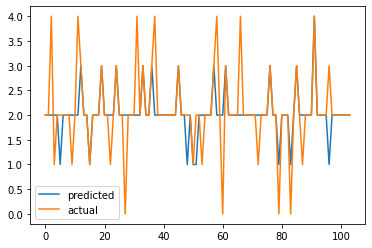

In [60]:
xhat = val_label
yhat = model.predict(val_feature)
yhat = np.array([np.argmax(i) for i in yhat])

plt.figure()
plt.plot(yhat, label = "predicted")
plt.plot(val_label,label = "actual")

plt.legend(prop={'size': 10})
plt.show()

In [61]:
def print_stats(preds, labels):
    print("Accuracy = {}".format(accuracy_score(labels, preds)))
    print("Precision = {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall = {}".format(recall_score(labels, preds, average='weighted')))
    print("f1_score = {}".format(f1_score(labels, preds, average='weighted')))

* 성능 수치화

In [62]:
print_stats(val_label, yhat)

Accuracy = 0.8076923076923077
Precision = 0.8921905796905796
Recall = 0.8076923076923077
f1_score = 0.8431323000898474


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* test 예측

In [63]:
test_predict = model.predict(test_feature)
test_predict = [np.argmax(i) for i in test_predict]

In [64]:
test_predict

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 4,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]